In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [23]:
from sklearn.datasets import load_diabetes

**1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.**

Использование существующих датасетов.

In [3]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
       
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def residual(y, z):
    return - (z - y)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    #train_errors = []
    #test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            #train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            #test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            #train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            #test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees #, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    #print(f'Ошибка алгоритма из {num} деревьев глубиной {depth} \
    #с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    #print(f'Ошибка алгоритма из {num} деревьев глубиной {depth} \
    #с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    train_error = mean_squared_error(y_train, train_prediction)
    test_error = mean_squared_error(y_test, test_prediction)
    return train_error, test_error


Переберем в цикле значения для количества деревьев в ансамбле и с различной глубиной.  
Полученные результаты добавим в массив, для последующего построения графиков.

In [10]:
tree_depth = np.linspace(1, 10, 10, dtype='int8')
tree_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

In [11]:
tree_num = np.linspace(1, 100, 10, dtype='int8')
tree_num

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100], dtype=int8)

In [12]:
eta = 0.1

Массив с результатами, по которым будет пострен график.

In [13]:
results = []

In [14]:
%%time
for depth in tree_depth:
    for num in tree_num:
        trees = gb_fit(num, depth, X_train, X_test, y_train, y_test, eta)
        train_error, test_error = evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)    
        results.append([depth, num, train_error, test_error])

Wall time: 52min 24s


In [15]:
results

[[1, 1, 23690.797492506248, 26561.924205468862],
 [1, 12, 5661.81041292544, 6071.460924904518],
 [1, 23, 3466.509560035598, 3354.8772710088215],
 [1, 34, 3033.0628532183273, 2868.2252423111704],
 [1, 45, 2864.7763852094367, 2757.165115305838],
 [1, 56, 2769.5390764497924, 2734.3440381759247],
 [1, 67, 2700.05541720353, 2696.874586852645],
 [1, 78, 2642.057442002076, 2681.7221467154527],
 [1, 89, 2592.4162469216335, 2664.1206096224837],
 [1, 100, 2548.931881081175, 2663.4913095234897],
 [2, 1, 23539.852323228188, 26133.825627290484],
 [2, 12, 5014.72541368314, 5301.322678861407],
 [2, 23, 2839.2885125440775, 2984.0642321652153],
 [2, 34, 2420.3430683735633, 2717.918720320727],
 [2, 45, 2236.433979701925, 2688.0700568966545],
 [2, 56, 2075.532602034206, 2737.5902278127387],
 [2, 67, 1978.9000450269664, 2763.6054687547226],
 [2, 78, 1880.735006712981, 2769.668332596633],
 [2, 89, 1799.06749281298, 2795.7151392347487],
 [2, 100, 1725.9561323464034, 2861.2894307540014],
 [3, 1, 23438.819954

In [21]:
results_np = np.array(results)

In [16]:
df = pd.DataFrame(results)
df = df.rename(columns={0:'depth', 1:'number_of_trees', 2:'train_error', 3:'test_error'})
df.head()

,depth,number_of_trees,train_error,test_error
0,1,1,23690.797493,26561.924205
1,1,12,5661.810413,6071.460925
2,1,23,3466.509560,3354.877271
3,1,34,3033.062853,2868.225242
4,1,45,2864.776385,2757.165115


Нарисуем графики для различных глубин дерева.

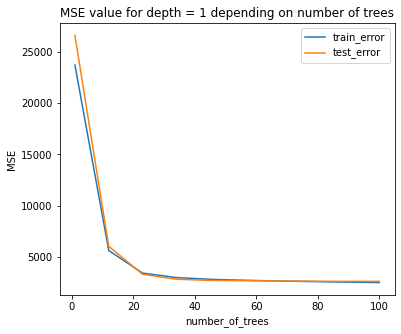

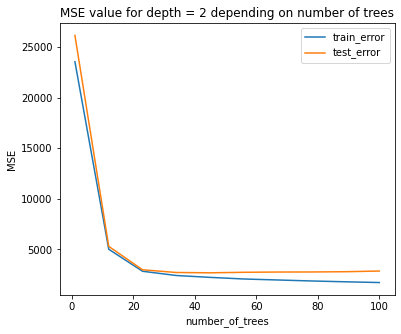

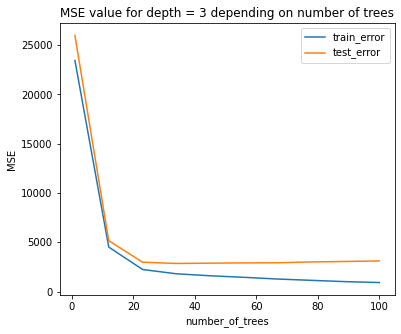

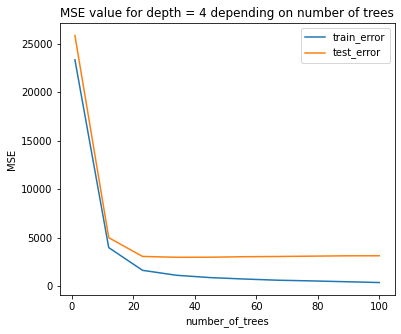

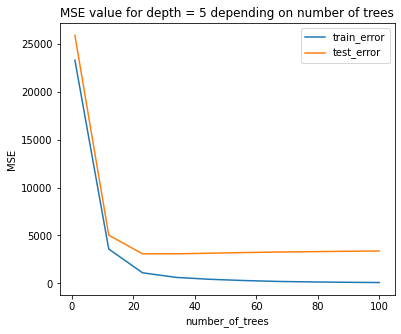

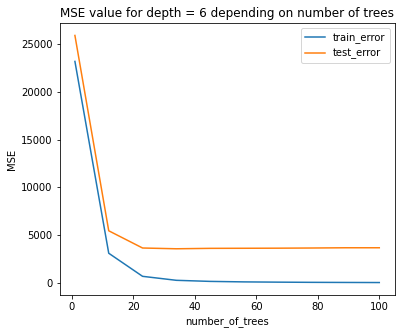

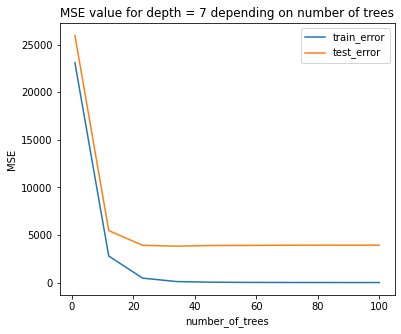

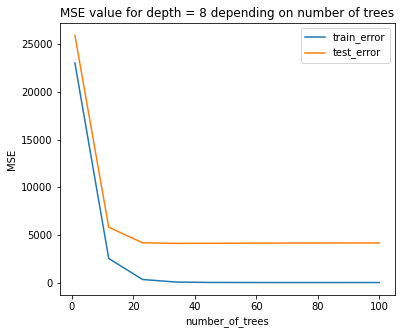

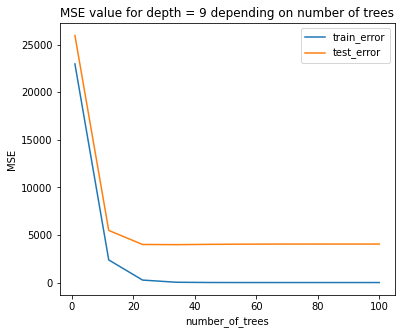

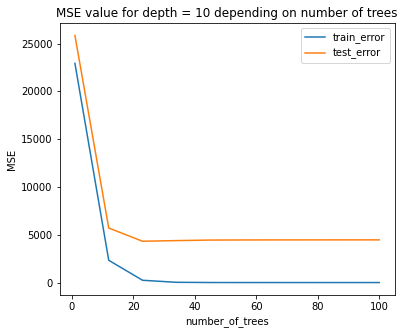

In [17]:
for i in range(1, 11):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    df_temp = df[df['depth']==i]    
    #plt.plot(df_temp['number_of_trees'], df_temp[['train_error','test_error']])
    ax.plot(df_temp['number_of_trees'], df_temp['train_error'], label='train_error')
    ax.plot(df_temp['number_of_trees'], df_temp['test_error'], label = 'test_error')
    plt.title(f'MSE value for depth = {i} depending on number of trees')
    ax.set_xlabel('number_of_trees')
    ax.set_ylabel('MSE')
    ax.legend()
plt.show()

Построим трехмерное отображение, несмотря на его пониженную информативность в данном случае.


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

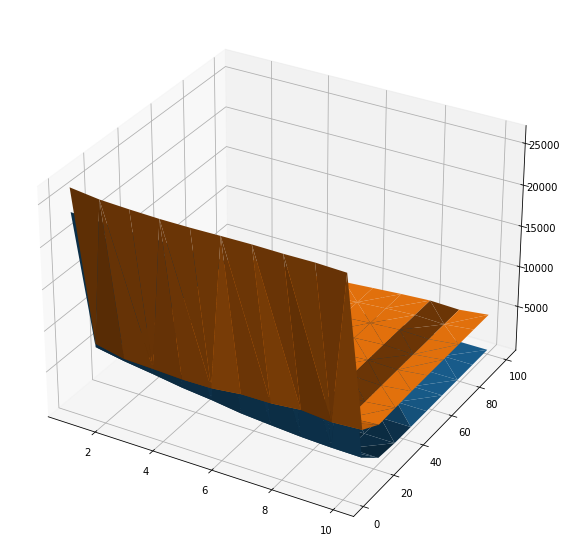

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax._facecolors = ax._facecolor 

ax.plot_trisurf(results_np[:, 0], results_np[:, 1], results_np[:, 2], label='train', linewidth=0.2, antialiased=True)
ax.plot_trisurf(results_np[:, 0], results_np[:, 1], results_np[:, 3], label='test', linewidth=0.2, antialiased=True)
#surf._edgecolors2d=surf._edgecolors3d
#ax.plot_trisurf(results[:, 0], results[:, 1], results[:, 3], label='test', linewidth=0.2, antialiased=True)
#ax.scatter(results[:, 0], results[:, 1], results[:, 3], label='test')

ax.legend()
ax.set_xlabel('depth')
ax.set_ylabel('n_trees')
ax.set_zlabel('error')
plt.show()

**2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.**

Как таковой градиентный спуск релизован под капотом используемой стандартной функции из sklearn, поэтому можно предположить, что заданием является передача случайного набора строк в размере 50% от исходного датасета для ускорения процесса обучения.  
Верификация происходит по-прежнему для 100% выборки.

Измененная функция

In [79]:
def sgd_fit_task_2(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            #----------------------------------------------------------------------------------
            # Берем в качетсве подвыборки 50% от исходного датасета
            #----------------------------------------------------------------------------------
            indeces = np.random.randint(0, X_train.shape[0], int(0.5 * X_train.shape[0])) 
            print(indeces)
            X_train_sb = X_train[indeces]
            y_train_sb = y_train[indeces]
            #---------------------------------------------------------------------------------
            tree.fit(X_train_sb, y_train_sb)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            #train and test errors list
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Проверка работы измененной функции.  
некоторые функции будут дублировать предыдущее задание, но я оставил их здесь, для обеспечения целостности кода.

In [58]:
X, y = load_diabetes(return_X_y=True)

In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [49]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [50]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [51]:
def bias(y, z):
    return (y - z)

In [69]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [76]:
# Число деревьев в ансамбле
n_trees = 3

# Максимальная глубина деревьев
max_depth = 5

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Шаг
eta = 1



In [80]:
%%time
trees, train_errors, test_errors = sgd_fit_task_2(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

[300 305 300 120  11 151  35 280 184   9 251 318 222 281  58 230  76 210
 159 319  31  65  81  95 266 218 143  21  62 195 152 305 100 216  99 164
 146 147 234 228 105  81 136 297 180 125 298  39  22 273 134 125  38  82
 166 321 228 162 168  37 125 123  65 184  54 229 237 317  81 238 146 275
 288  34 105  29 173 294 268 269 292 146 320 122 292  28 234 187 302 123
 200 321  98 235 284 299 188 119   1 230 153 167 252  48  79  89   9  49
 282 280 215  84  89  12 230 309 111  23   0  32  38 255 142 111 238  76
 189 326 246 184  56 102 325 242 270 208 101 221 196 111 101  82 325 135
  52 199  29 140  76 131 294 238 274 135 108 237 189 176 314  24  79 241
 188 145 250]
Wall time: 167 ms


In [78]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1534.8529634814893
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6743.379422488209


**3. *Оптимизировать процесс обучения градиентного бустинга, чтобы он занимал меньше времени.**

Можно предположить, что задянием являлось усовепшенствование функции gb_predict.  
Т.к. fit  функция реализована при помощи sklearn.

In [87]:
def gb_predict_task3(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    predictions_n = (eta * trees_list.predict(X)[0]).sum()
        
    #predictions = np.array(
    #    [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    #)
    
    

    return predictions

In [85]:
def gb_fit_task3(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_task3(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_task3(X_test, trees,  eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [88]:
%%time
trees, train_errors, test_errors = gb_fit_task3(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

AttributeError: 'list' object has no attribute 'predict'